|课程名称：数据挖掘|学生姓名：邓力予|学生学号：20201910442|
|-|-|-|
|实验名称：第十章|
|学院：数学与统计学院|专业：数据科学与大数据技术|年级：2020级|

# 前置工作

## 导入需要的包

In [21]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from pandas import read_csv
from os import walk
from numpy import array
from matplotlib import pyplot as plt

## 读取模型

In [22]:
model_dict={}
for i in tuple(walk("model_results"))[0][2]:
    model_dict[i[:-7]]=read_csv("model_results/"+i,index_col="Unnamed: 0")

## 名词解释

|||
|-|-|
|bagging|袋装决策树|
|bart|贝叶斯可加回归树|
|forest|随机森林|
|gradient|梯度提升决策树|
|lasso|Lasso|
|logistic|Logistic 回归|
|mlp|神经网络|
|tree|决策树|

# GrossCat2

## 累计捕获响应频率图

中文和负号的正常显示

In [23]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

定义检出率

In [24]:
def dp(target,model):
    TP=0
    FP=0
    for i in range(len(target)):
        match(target[i],model[i]):
            case(1,1):
                TP=TP+1
            case(0,1):
                FP=FP+1
    return(TP+FP)/len(target)

计算检出率和 TPR

In [25]:
tr_line_cat2={}
for i,data in zip(model_dict.keys(),model_dict.values()):
    if i.endswith("cat2") and (i.startswith("logistic") or i.startswith("tree") or i.startswith("gradient")):
        tr_line_item={}
        tr_line_item["fpr"], tr_line_item["tpr"], tr_line_item["thresholds"] = roc_curve(array(data["真实值":"真实值"])[0], array(data["预测值":"预测值"])[0])

        pre=array(data["预测值":"预测值"])[0]
        for j,pre_data in enumerate(pre):
            pre[j]=round(pre_data)
        tr_line_item["dp"]=(0,dp(array(data["真实值":"真实值"])[0],pre),1)

        tr_line_cat2[i]=tr_line_item

绘图

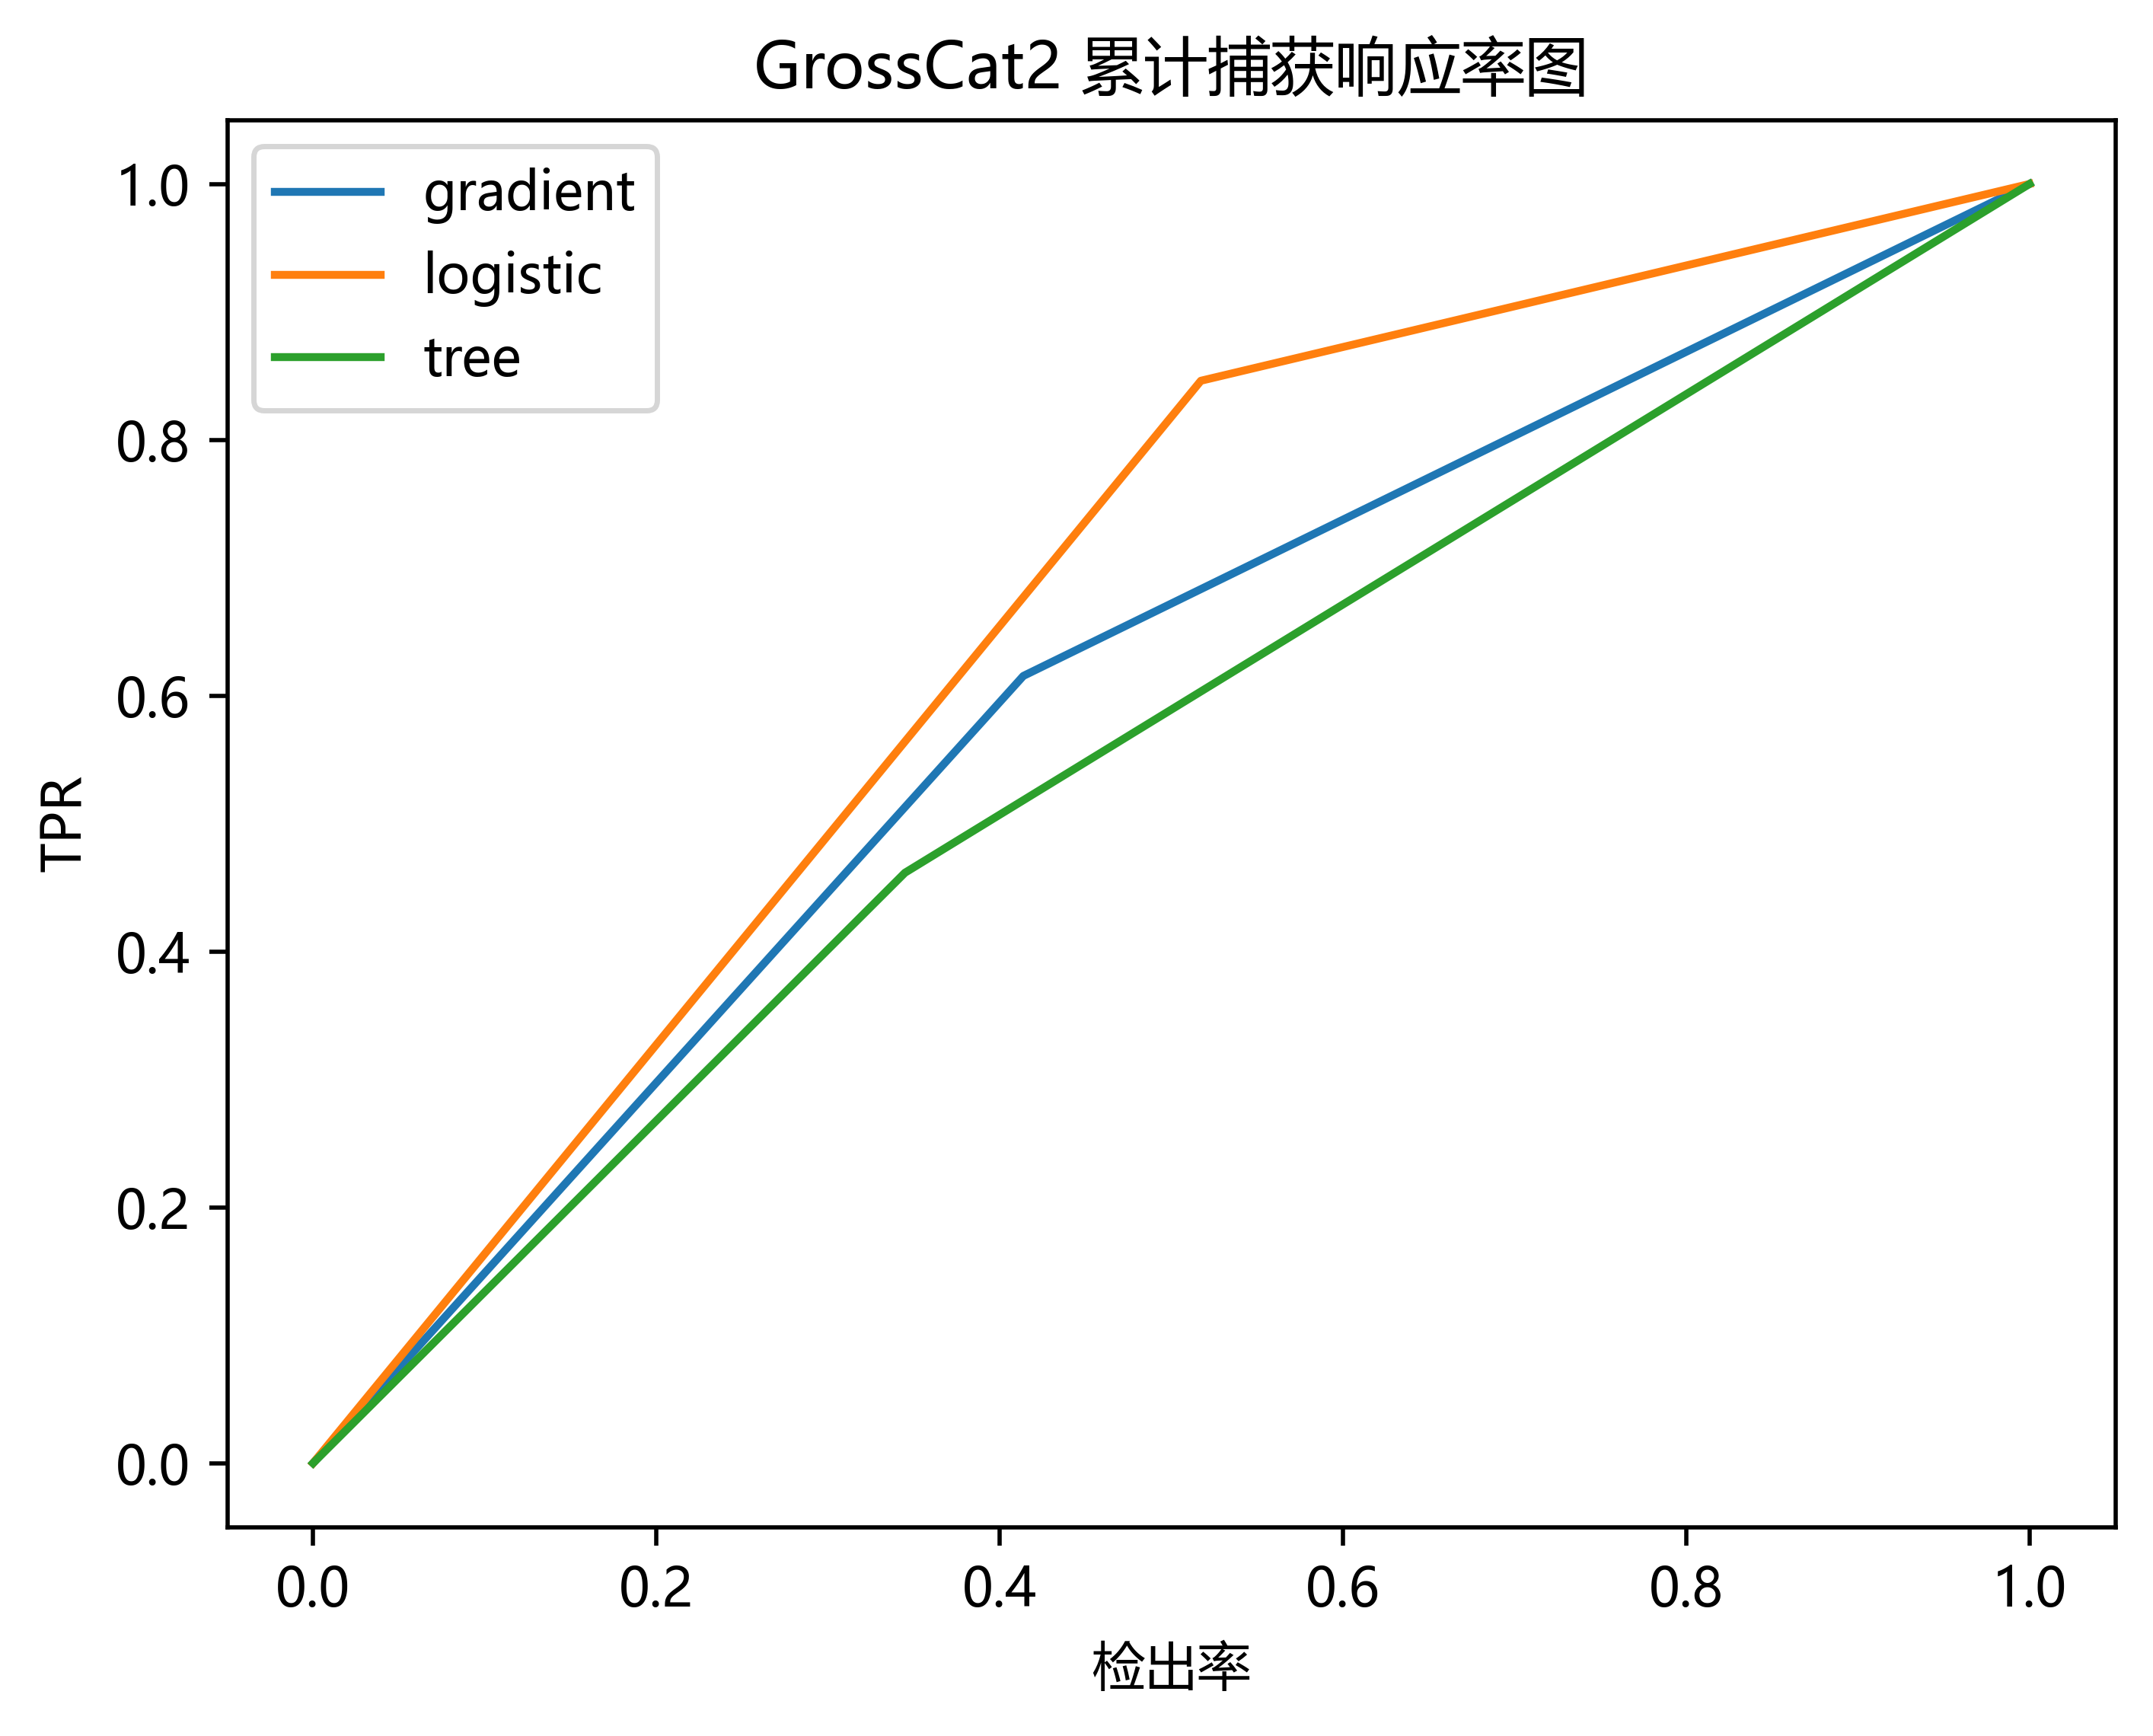

In [26]:
fig, ax = plt.subplots(dpi=500) # 创建图实例

for i,data in zip(tr_line_cat2.keys(),tr_line_cat2.values()):
    ax.plot(data["dp"],data["tpr"], label=i[:-5])
    # print(data["dp"],data["tpr"])

ax.set_xlabel("检出率")
ax.set_ylabel("TPR")
ax.set_title('GrossCat2 累计捕获响应率图') #设置图名
ax.legend() #自动检测要在图例中显示的元素，并且显示

plt.show() #图形可视化

## 准确率

In [27]:
for i,data in zip(model_dict.keys(),model_dict.values()):
    if i.endswith("cat2"):
        pre=array(data["预测值":"预测值"])[0]
        for j,pre_data in enumerate(pre):
            pre[j]=round(pre_data)
        print(i[:-5],":",accuracy_score(array(data["真实值":"真实值"])[0],pre))

bagging : 0.6896551724137931
bart : 0.7241379310344828
forest : 0.6206896551724138
gradient : 0.6896551724137931
lasso : 0.8620689655172413
logistic : 0.7931034482758621
mlp : 0.6896551724137931
tree : 0.6206896551724138


## ROC 曲线

计算 ROC 

In [28]:
roc_line_cat2={}
for i,data in zip(model_dict.keys(),model_dict.values()):
    if i.endswith("cat2") and (i.startswith("logistic") or i.startswith("tree") or i.startswith("gradient")):
        target=array(data["真实值":"真实值"])[0]
        model=array(data["预测值":"预测值"])[0]
        roc_line_item={}
        roc_line_item["fpr"], roc_line_item["tpr"], roc_line_item["thresholds"] = roc_curve(target, model)
        roc_line_cat2[i] = roc_line_item

绘图

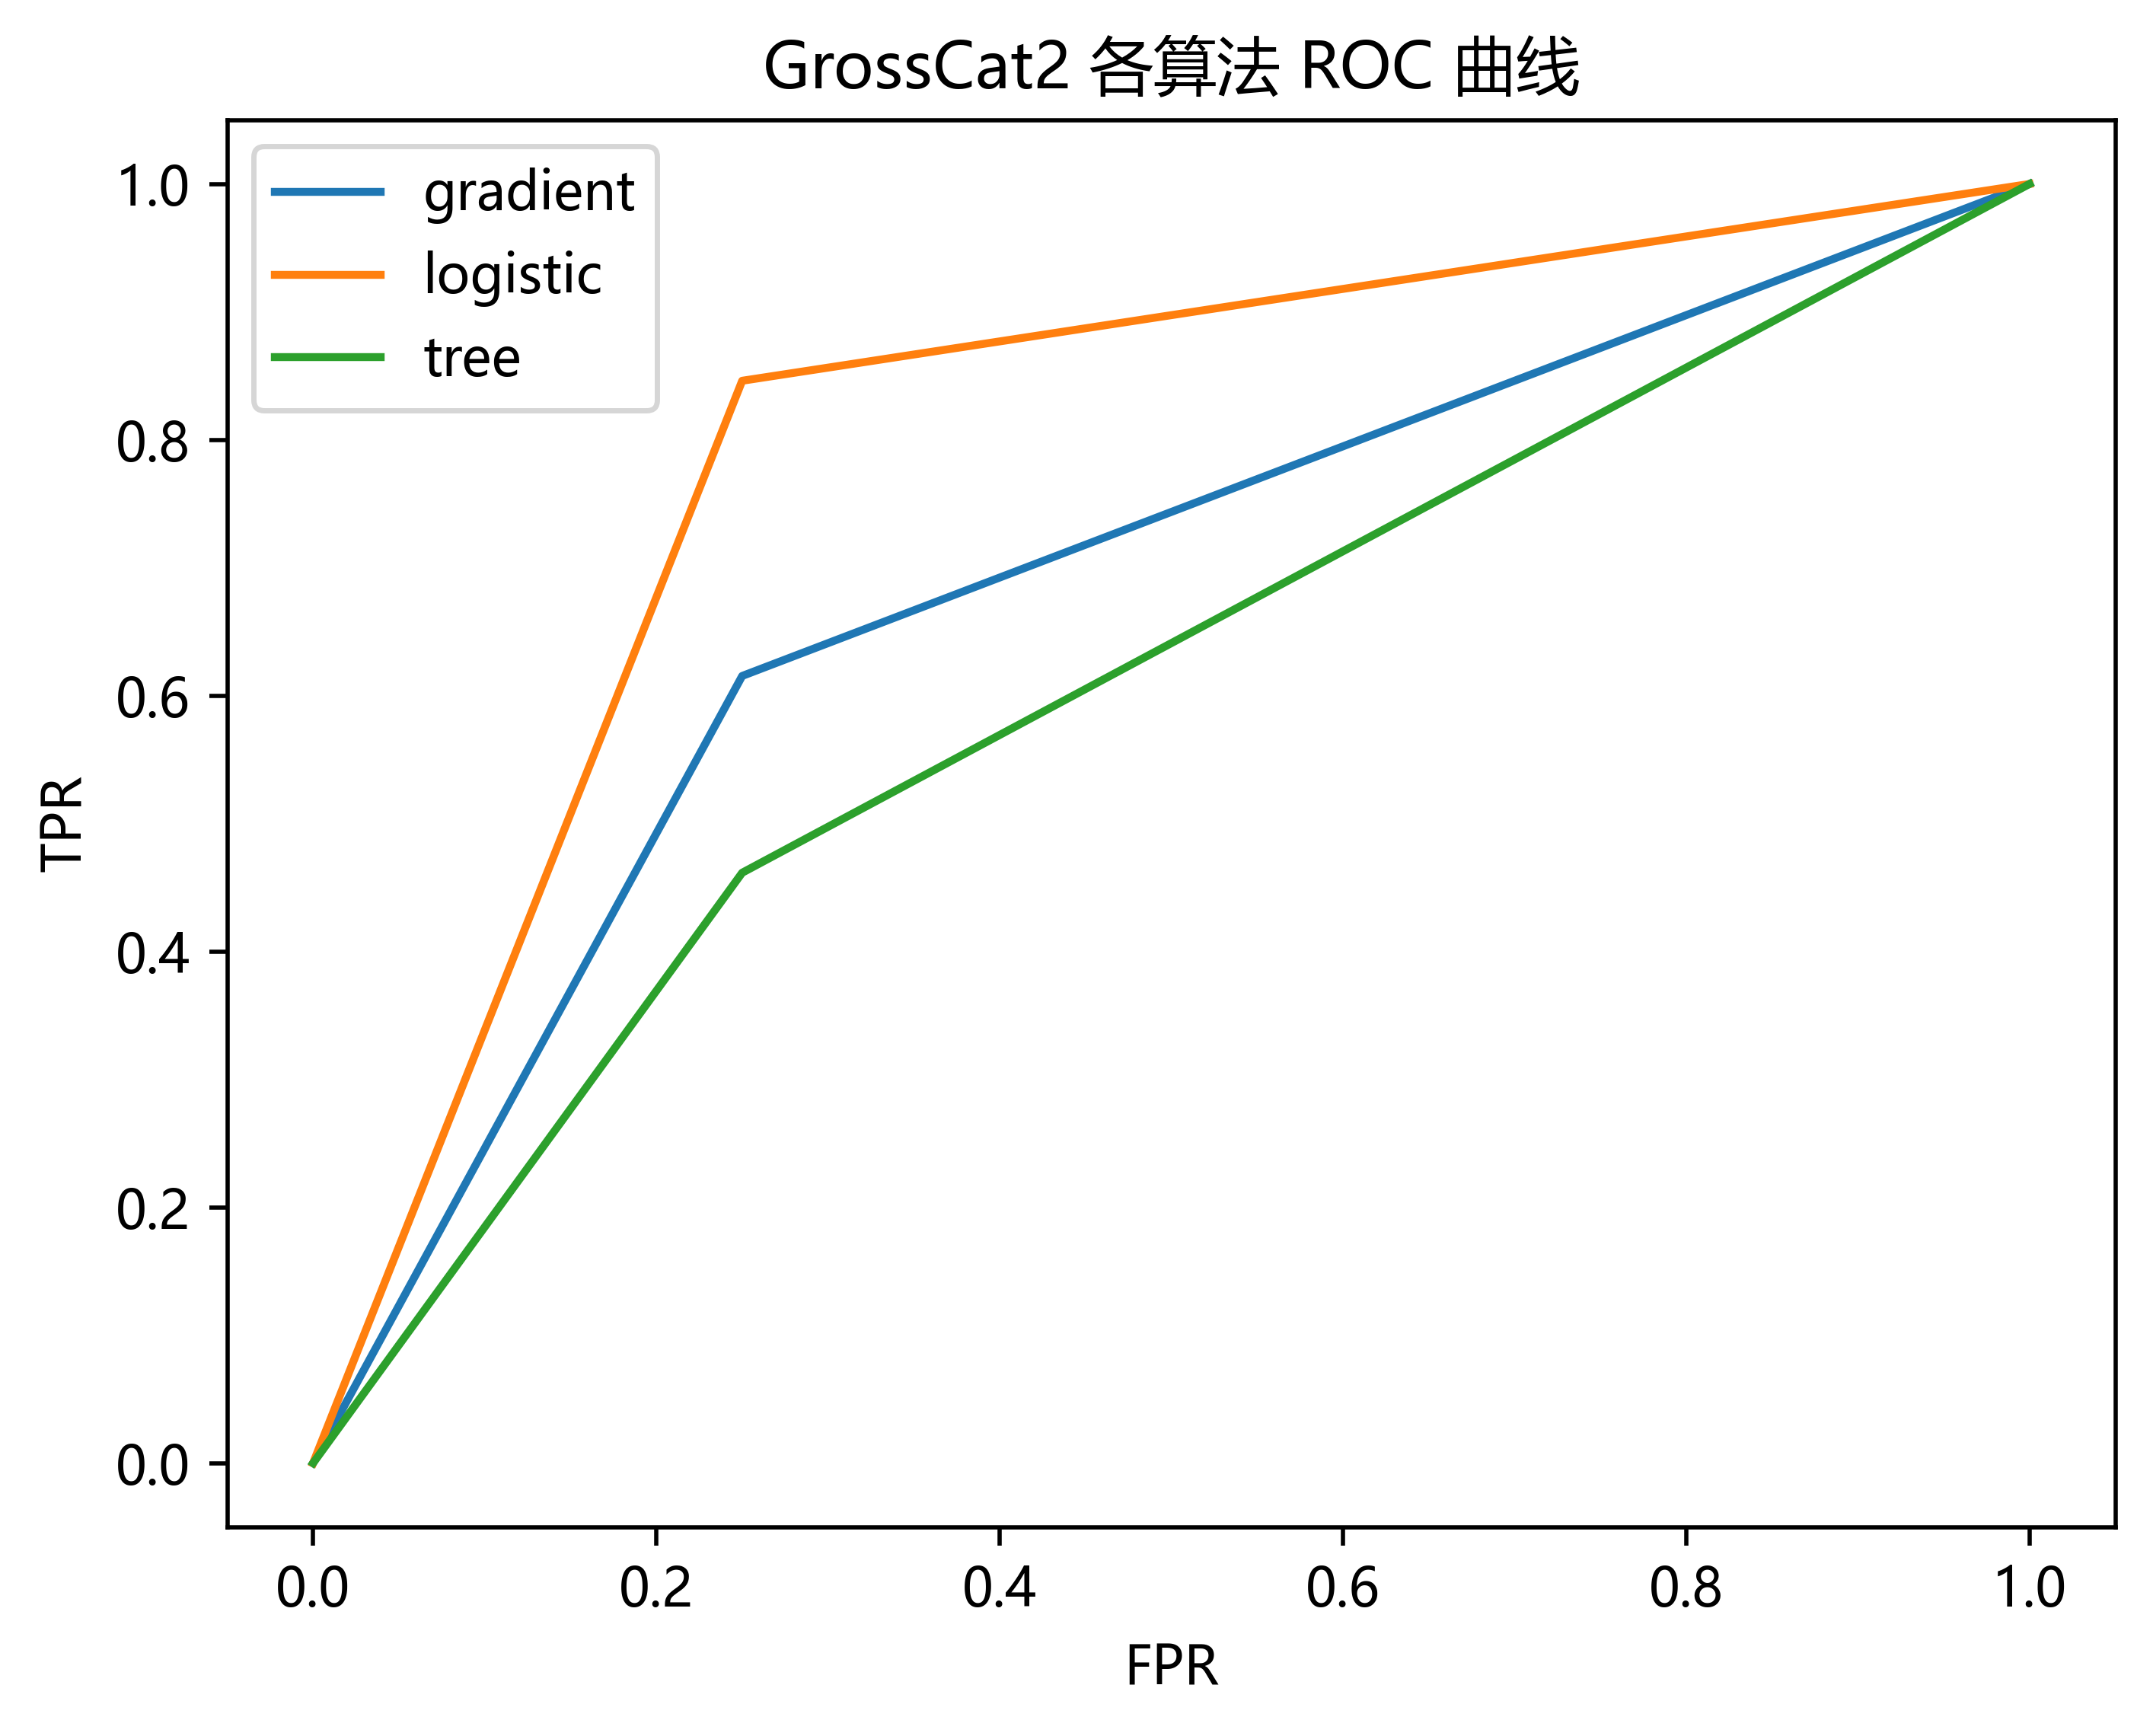

In [29]:
fig, ax = plt.subplots(dpi=500) # 创建图实例

for i,data in zip(roc_line_cat2.keys(),roc_line_cat2.values()):
    ax.plot(data["fpr"],data["tpr"], label=i[:-5])

ax.set_title('GrossCat2 各算法 ROC 曲线') #设置图名为
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend() #自动检测要在图例中显示的元素，并且显示

plt.show() #图形可视化

## ROC面积

In [30]:
for i,data in zip(model_dict.keys(),model_dict.values()):
    if i.endswith("cat2"):
        target=array(data["真实值":"真实值"])[0]
        model=array(data["预测值":"预测值"])[0]
        print(i[:-5],":",roc_auc_score(target,model))

bagging : 0.6754807692307693
bart : 0.7067307692307692
forest : 0.6057692307692308
gradient : 0.6826923076923077
lasso : 0.9230769230769231
logistic : 0.798076923076923
mlp : 0.6682692307692308
tree : 0.6057692307692308


# GrossCat

## 误分类率

In [34]:
for i,data in zip(model_dict.keys(),model_dict.values()):
    if i.endswith("cat"):
        pre=array(data["预测值":"预测值"])[0]
        for j,pre_data in enumerate(pre):
            pre[j]=round(pre_data)
        print(i[:-4],":",1-accuracy_score(array(data["真实值":"真实值"])[0],pre))

baggin : 0.5862068965517242
bar : 0.5517241379310345
fores : 0.5862068965517242
gradien : 0.5862068965517242
lass : 0.48275862068965514
logisti : 0.5172413793103448
ml : 0.4137931034482759
tre : 0.6206896551724138


## ROC 曲线

计算 ROC 

In [31]:
roc_line_cat={}
for i,data in zip(model_dict.keys(),model_dict.values()):
    if i.endswith("cat") and (i.startswith("logistic") or i.startswith("tree") or i.startswith("gradient")):
        target=array(data["真实值":"真实值"])[0]
        model=array(data["预测值":"预测值"])[0]
        for j in(target,model):
            for m,data in enumerate(j):
                if data==4:
                    j[m]=1
                else:
                    j[m]=0
        roc_line_item={}
        roc_line_item["fpr"], roc_line_item["tpr"], roc_line_item["thresholds"] = roc_curve(target,model)
        roc_line_cat[i]=roc_line_item

绘图

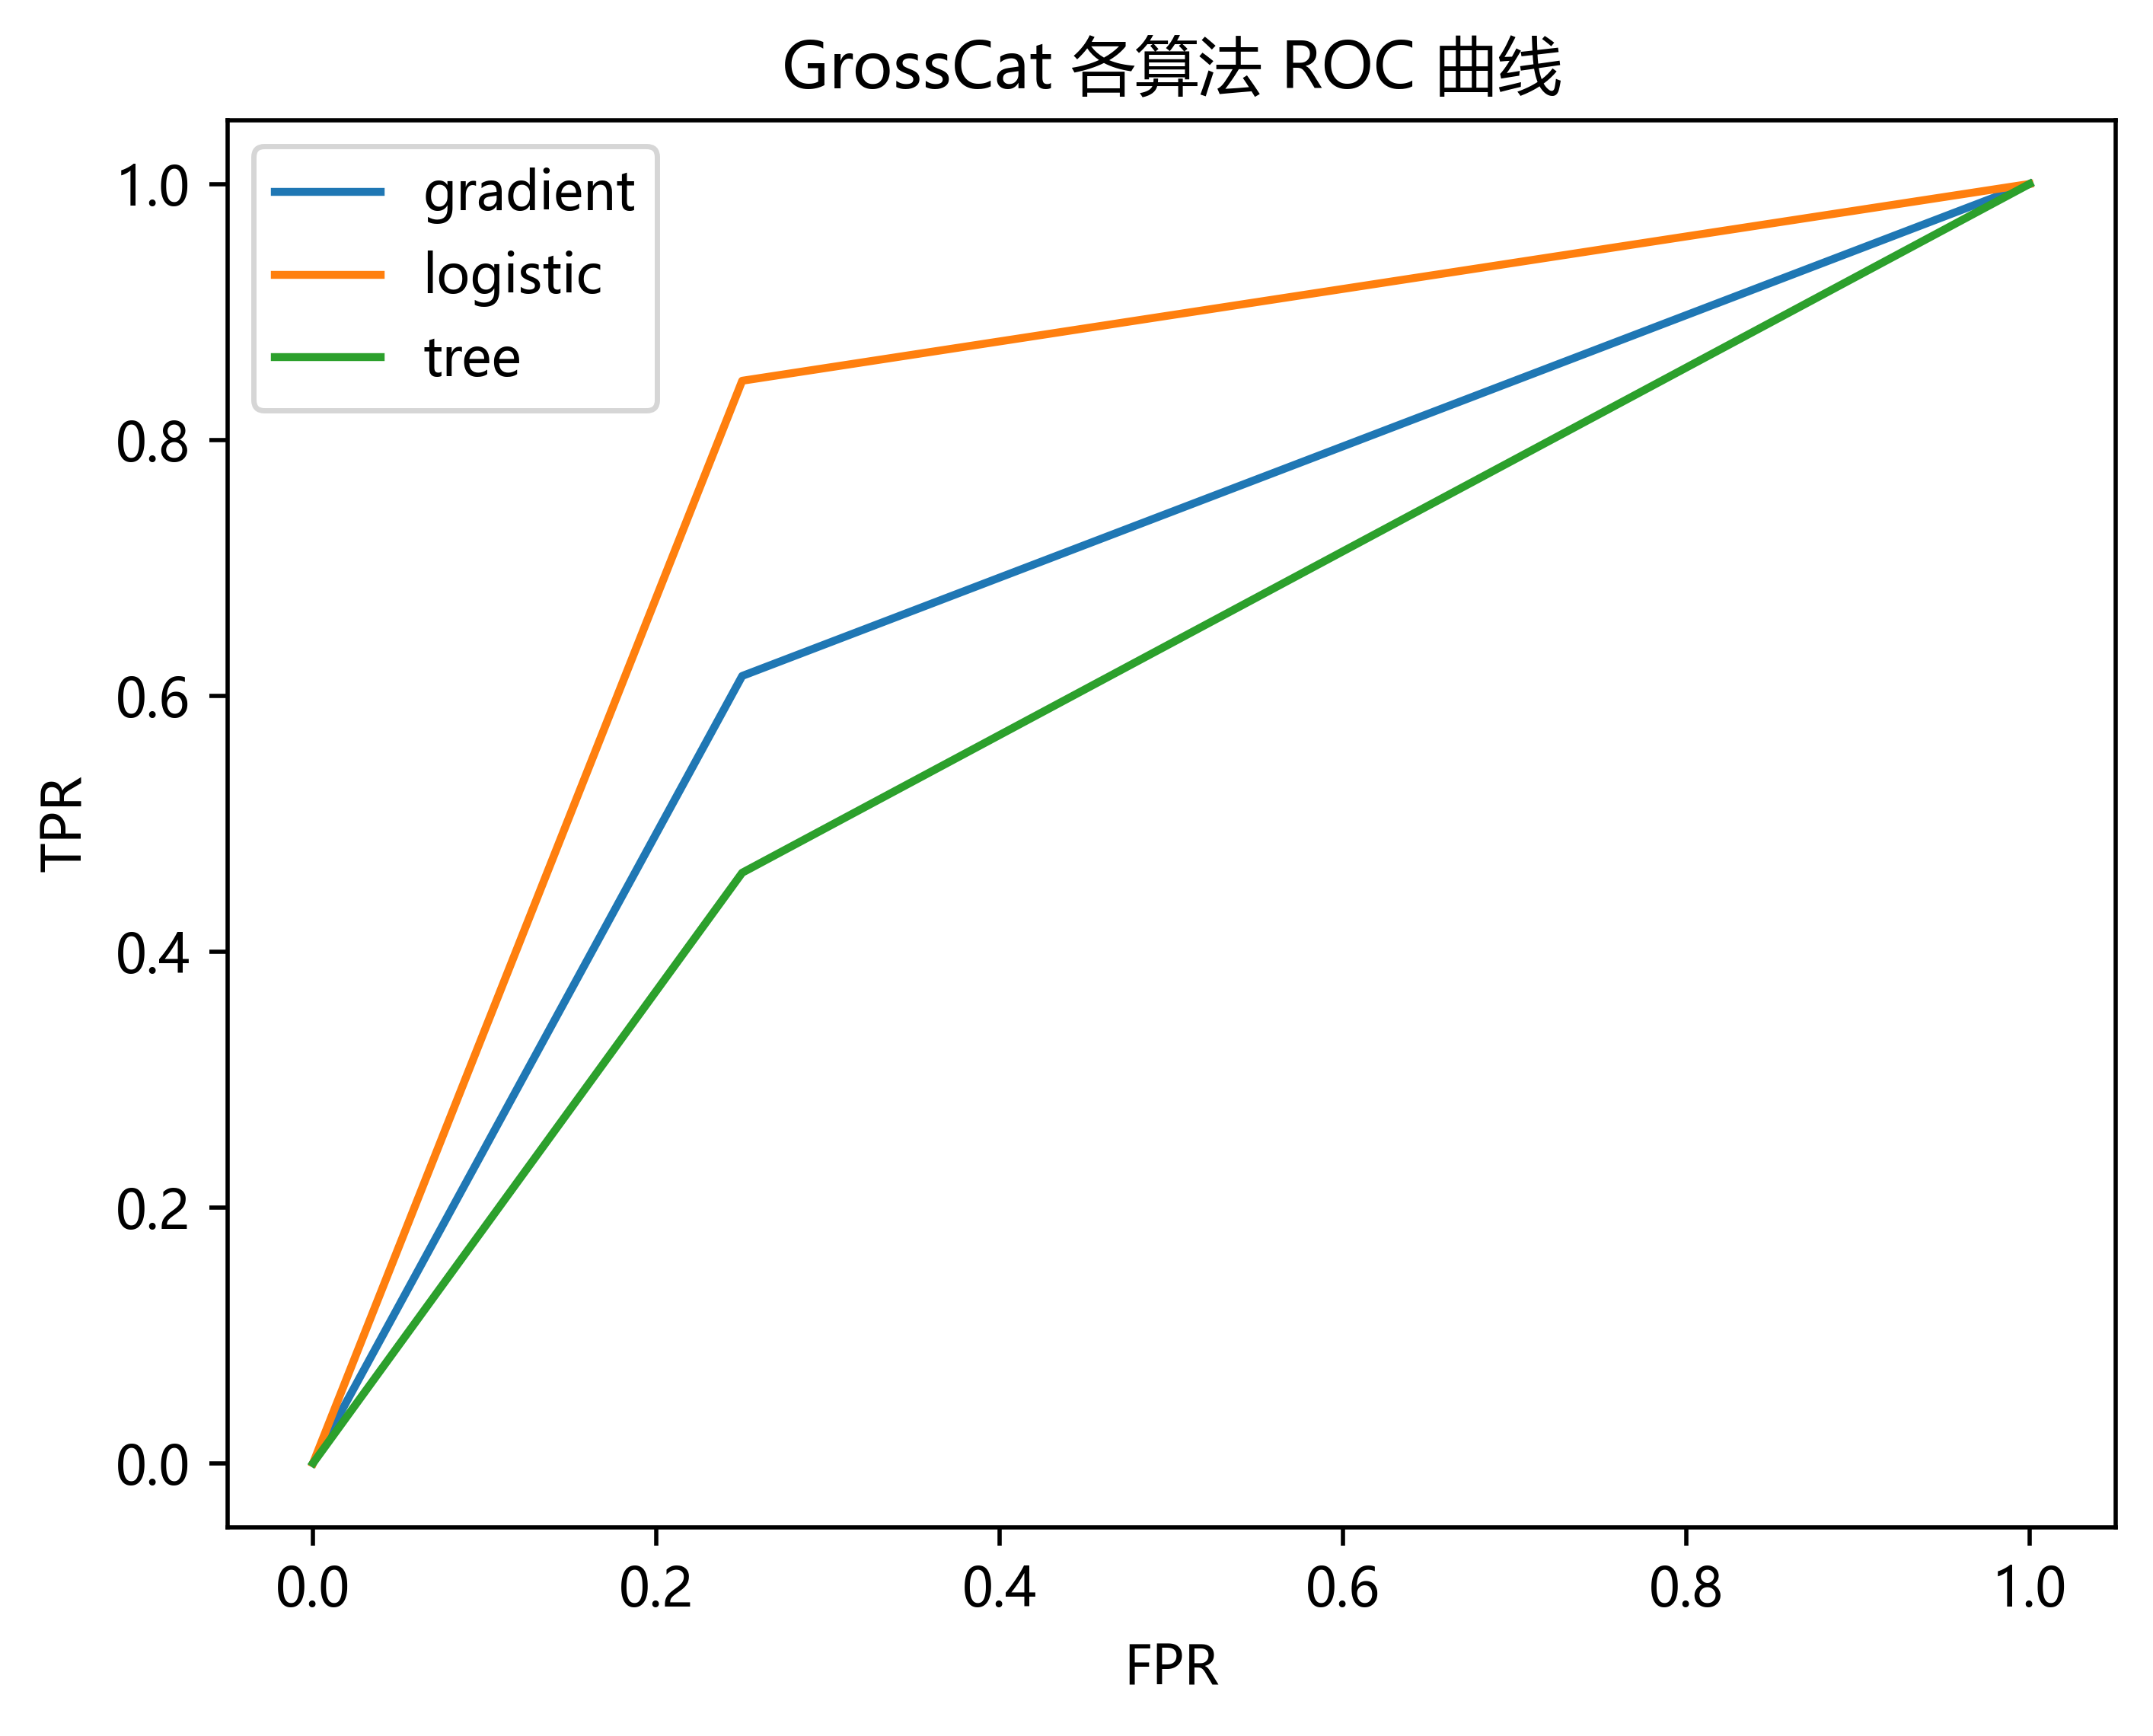

In [32]:
fig, ax = plt.subplots(dpi=500) # 创建图实例

for i,data in zip(roc_line_cat2.keys(),roc_line_cat2.values()):
    ax.plot(data["fpr"],data["tpr"], label=i[:-5])

ax.set_title('GrossCat 各算法 ROC 曲线') #设置图名为
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.legend() #自动检测要在图例中显示的元素，并且显示

plt.show() #图形可视化